**Import the libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the dataset**

In [3]:
df=pd.read_csv("revenue_prediction.csv")

In [5]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


**Examining missing values in a dataset**

In [6]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

**Drop irrelevant columns**

In [7]:
df=df.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"])

In [8]:
df.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [9]:
df.shape

(100, 2)

**Create independent feature and dependent variable**

In [10]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values  

**Split the dataset into Training set and Test set**

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Training the Simple Linear Regression model on the Training set**

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Predicting the Test set results**

In [13]:
y_pred=regressor.predict(x_test)

**Visualising the Training set results**

Text(0, 0.5, 'Revenue')

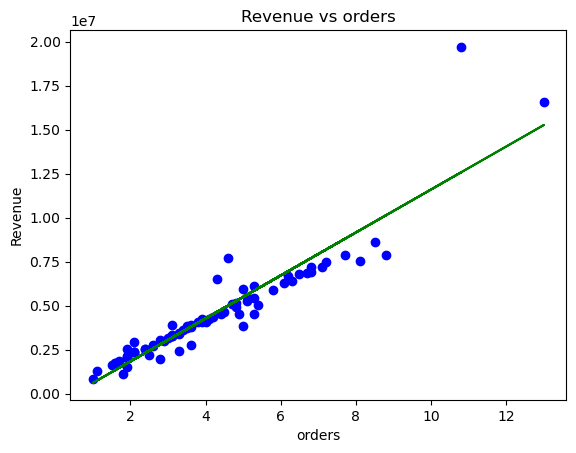

In [14]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")



**Visualising the Test set results**

Text(0, 0.5, 'Revenue')

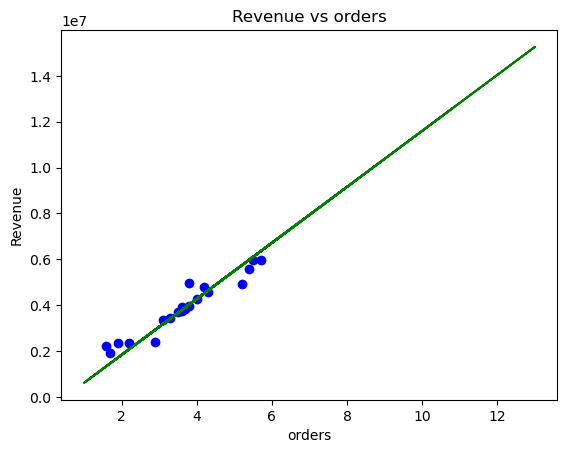

In [15]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

**Accuracy of the Model**

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test,y_pred)*100)

Mean absolute error : 318430.6326798171
Mean squared error : 186768572957.39294
Root Mean squared error : 432167.2974177858
87.24481996270592


In [24]:
pd.DataFrame([regressor.predict(x_test)[:5], y_test[:5]], index = ['Predicted', 'Actual'])

,0,1,2,3,4
Predicted,6.351103e+06,5.984999e+06,4.032441e+06,3.788371e+06,4.276511e+06
Actual,5.966193e+06,5.595267e+06,3.982767e+06,3.752885e+06,4.264176e+06
